In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [4]:
df=pd.read_csv("/content/drive/MyDrive/NLP/csv/UpdatedResumeDataSet.csv")


In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<Axes: xlabel='count', ylabel='Category'>

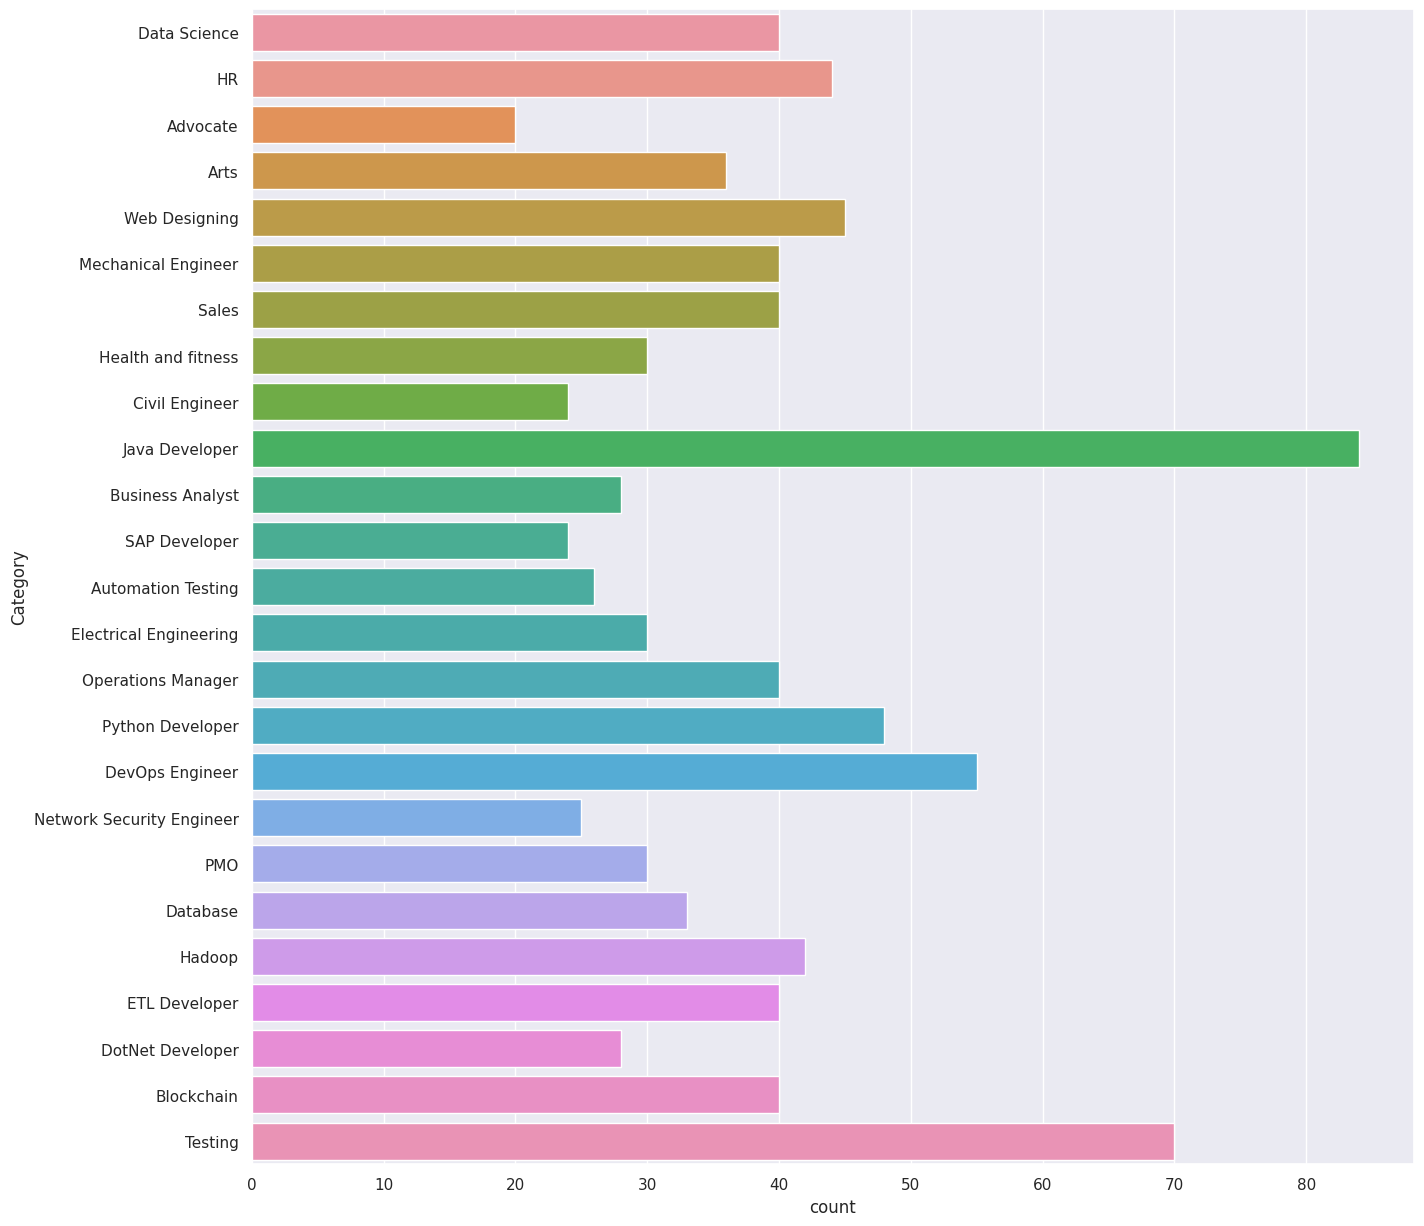

In [6]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(y=df["Category"])

In [7]:
df2=df

In [8]:
# Combine all resumes into a single string
all_text = ' '.join(df['Resume'])

In [9]:
# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)


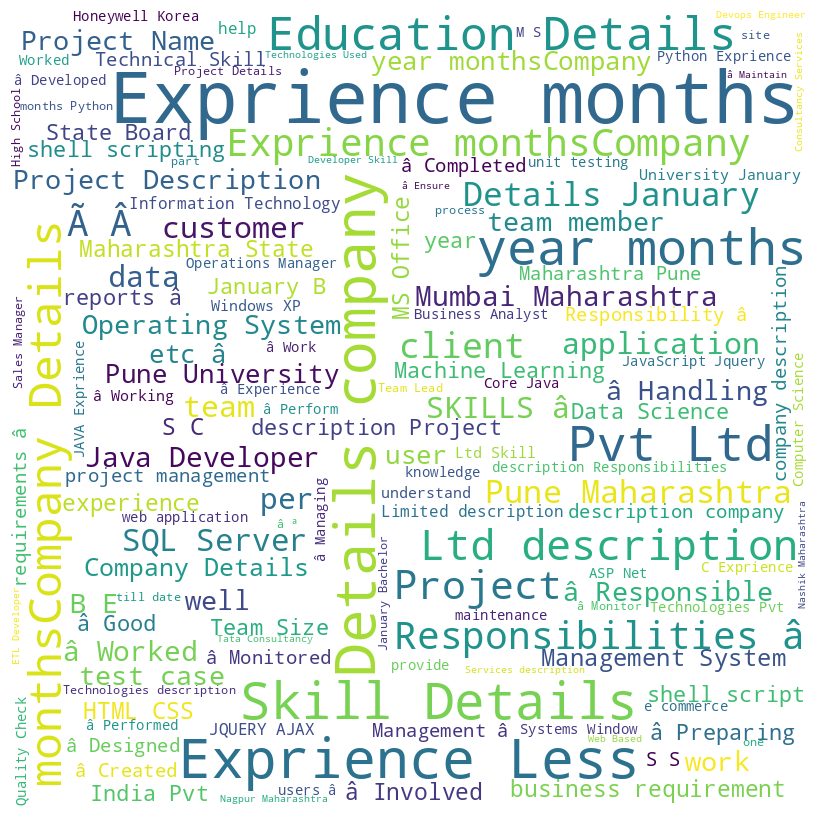

In [10]:
# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [11]:
# Preprocessing the data

# Preprocessing the data
def preprocess_text(sentence_list):
  lines = [] 
  word_list = [] 
  st = PorterStemmer()

  for line in sentence_list:
      #tokenize the text documents and update the lists word_list and lines
      words=[]
      for word in word_tokenize(line):
          if word.isalpha():
              words.append(word.lower())
              if word.lower() not in word_list:
                  word_list.append(word.lower())
      lines.append(' '.join(words))
  
  return lines
# lines = [] 
# word_list = [] 
# st = PorterStemmer()

# for line in df['Resume']:
#     #tokenize the text documents and update the lists word_list and lines
#     words=[]
#     for word in word_tokenize(line):
#         if word.isalpha():
#             words.append(word.lower())
#             if word.lower() not in word_list:
#                 word_list.append(word.lower())
#     lines.append(' '.join(words))
 
# df['Resume_tokenized'] = lines

In [12]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [13]:
df['Category_no'] = df.groupby('Category').ngroup()
df.head()

,Category,Resume,Category_no
0,Data Science,Skills * Programming Languages: Python (pandas...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6


In [14]:
from sklearn.model_selection import train_test_split


In [15]:

X_train, X_test, y_train, y_test = train_test_split(
    df.Resume_tokenized,
    df.Category_no,
    test_size = 0.2,
    random_state=2023,
    stratify=df.Category_no
)

AttributeError: ignored

In [ ]:
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
# Using KNN
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, workers=4):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers

    def fit(self, X, y=None):
        sentences = [s.split() for s in X]
        self.word2vec_model = Word2Vec(sentences,
                                       vector_size=self.vector_size,
                                       window=self.window,
                                       min_count=self.min_count,
                                       workers=self.workers)
        return self

    def transform(self, X):
        X_transformed = []
        if isinstance(X, str):
            X = [X]
        for s in X:
            if isinstance(s, str):
                vec = [self.word2vec_model.wv[w] for w in s.split() if w in self.word2vec_model.wv]
                vec = np.mean(vec, axis=0) if vec else np.zeros(self.vector_size)
                X_transformed.append(vec)
        if not X_transformed:
            X_transformed = [np.zeros(self.vector_size)]
        return np.array(X_transformed)

clf = Pipeline([
    ('word2vec', Word2VecTransformer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


In [ ]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
    ('word2vec', Word2VecTransformer()),
    ('Random Forest', RandomForestClassifier())
])

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.preprocessing import DenseTransformer

clf_gnb = Pipeline([
    ('Word2Vec', Word2VecTransformer()),
    ('to_dense', DenseTransformer()),
    ('GNB', GaussianNB())
])

clf_gnb.fit(X_train, y_train)

y_pred_gnb = clf_gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))

In [ ]:
pip install PyPDF2


In [ ]:
import PyPDF2

In [ ]:
# Testing from a new resume
from PyPDF2 import PdfReader

def extract_information(pdf_path):
    reader = PdfReader(pdf_path)
    number_of_pages = len(reader.pages)
    page = reader.pages[0]
    pdf_text = page.extract_text()
    
    return pdf_text

In [ ]:
pdf_import = extract_information('/content/drive/MyDrive/NLP/csv/test/data-scientist-resume-example.pdf')

In [ ]:
test_pdf = []
test_pdf.append(pdf_import)

cleaned_pdf = preprocess_text(test_pdf)

In [ ]:
# Testing the model

y_pred_test = clf.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])

In [ ]:
y_pred_test = clf2.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])

In [ ]:
y_pred_test = clf_gnb.predict(cleaned_pdf)
print(y_pred_test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])